In [1]:
import sys
sys.path.append("../")

In [2]:
from agents.matchmanager import MatchManager

from itertools import product

from agents import GreedyAgent, AlphaBetaAgent, RandomAgent
from scenarios import scenarioJunction, scenarioJunctionExo, scenarioTest1v1, scenarioTest2v2
from core.const import RED, BLUE
import json
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
def createDf(output):
    agents = ['RandomAgent','RegressorAgent','ClassifierAgent','GreedyAgent','RegressorMultiAgent']
    scenarios = ['Junction']
    all_json=[]
    for i in range(0, 100):
        for s in scenarios:
            for agentRed, agentBlue in product(agents, agents):
                file_name=f'../{output}/{agentRed}_{agentBlue}_{s}_{i}.json'
                data=json.load(open(file_name))
                all_json.append(data)  
    df=pd.DataFrame(all_json)
    return df

In [4]:
def addWinnerColumn(df):
    winner_agent=[]
    for i in range(len(df)):
        if ((df["teamRed"][i] == "RegressorAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "RegressorAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("RegressorAgent")
        elif ((df["teamRed"][i] == "ClassifierAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "ClassifierAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("ClassifierAgent")
        elif ((df["teamRed"][i] == "RandomAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "RandomAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("RandomAgent")
        elif ((df["teamRed"][i] == "GreedyAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "GreedyAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("GreedyAgent")
        elif ((df["teamRed"][i] == "RegressorMultiAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "RegressorMultiAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("RegressorMultiAgent")
    return winner_agent


In [5]:
def matchesWonForEachAgent(df):
    print("General percentages")
    df['winnerAgent'].value_counts().plot.bar(title='games won for each agent')
    print('Percentage Regressor:',len(df[df['winnerAgent']=="RegressorAgent"])/len(df))
    print('Percentage Classifier:',len(df[df['winnerAgent']=="ClassifierAgent"])/len(df))
    print('Percentage RandomAgent:',len(df[df['winnerAgent']=="RandomAgent"])/len(df))
    print('Percentage GreedyAgent:',len(df[df['winnerAgent']=="GreedyAgent"])/len(df))
    print('Percentage RegressorMulti:',len(df[df['winnerAgent']=="RegressorMultiAgent"])/len(df))

In [6]:
def agentVs(df,agent):
    print("AGENT VS AGENT")
    agents = ['RegressorAgent','RandomAgent','ClassifierAgent','GreedyAgent','RegressorMultiAgent']
    agents.remove(agent)
    fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(16,8))
    ax = ax.ravel()
    for i,a in enumerate(agents):

        mask=df.loc[((df.teamRed == agent) & (df.teamBlue == a))|((df.teamRed == a) & (df.teamBlue == agent))]
        print(f'Percentage {agent} on {a}:',len(mask[mask['winnerAgent']==agent])/len(mask))
        x=list(set(mask['winnerAgent']))
        height=(((mask['winnerAgent'].value_counts())/len(mask))*100)
        #ax[i].bar(x,height)
        sns.barplot(x,height,ax=ax[i])

        ax[i].set_ylabel('Percentuale vittoria')
        ax[i].set(ylim=(0, 100))
        ax[i].set_title('scenario - Junction', fontsize=10)

    plt.plot() 
    #plotta percentuali-> fai solo scenario junction (nel caso junctionexo)


In [34]:
def agentVsColor(df,agent):
    print("AGENT VS AGENT FOR COLOR")
    agents = ['RegressorAgent','RandomAgent','ClassifierAgent','GreedyAgent','RegressorMultiAgent']
    colors=['red','blue']
    agents.remove(agent)
    fig, ax = plt.subplots(ncols=4,nrows=2, figsize=(20,10))
    ax = ax.ravel()
    for i,a in enumerate(product(colors,agents)):
        if a[0]=='red':
            mask=df.loc[((df.teamRed == agent) & (df.teamBlue == a[1]))]
            print(f'Percentage {agent} Red on {a[1]} Blue:',len(mask[mask['winner']=='red'])/len(mask))
            title=f'blue->{a[1]}'

        elif a[0]=='blue':
            mask=df.loc[((df.teamRed == a[1]) & (df.teamBlue == agent))]
            print(f'Percentage {a[1]} Red on {agent} Blue:',len(mask[mask['winner']=='blue'])/len(mask))
            title=f'Red->{a[1]}'

        #x=list(set(mask['winner']))
        height=(((mask['winner'].value_counts())/len(mask))*100)
        #ax[i].bar(x,height)
        sns.barplot(['blue','red'],height,ax=ax[i])
        ax[i].set_ylabel('Percentuale vittoria')
        ax[i].set(ylim=(0, 100))
        ax[i].set_title(title)


    fig.suptitle(f'Graph for {agent}, first row red and second blue', fontsize=14)


    plt.plot() 
   

In [7]:
dfAll=createDf("output")
dfAll["winnerAgent"]=addWinnerColumn(dfAll)

General percentages
Percentage Regressor: 0.1884
Percentage Classifier: 0.1696
Percentage RandomAgent: 0.176
Percentage GreedyAgent: 0.2888
Percentage RegressorMulti: 0.1772


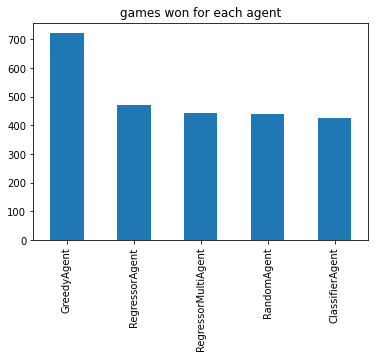

In [12]:
matchesWonForEachAgent(dfAll)

AGENT VS AGENT
Percentage RegressorAgent on RandomAgent: 0.555
Percentage RegressorAgent on ClassifierAgent: 0.53
Percentage RegressorAgent on GreedyAgent: 0.27
Percentage RegressorAgent on RegressorMultiAgent: 0.5


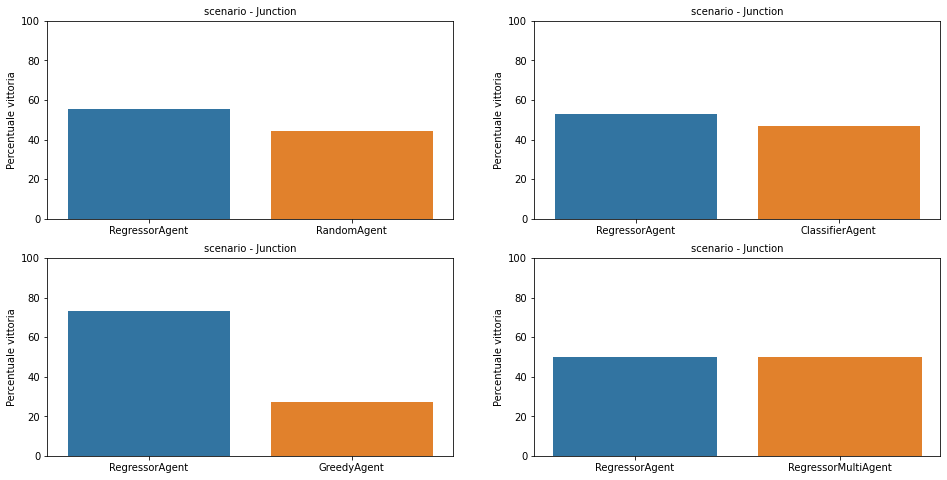

In [8]:
agentVs(dfAll,'RegressorAgent')

AGENT VS AGENT
Percentage RegressorMultiAgent on RegressorAgent: 0.5
Percentage RegressorMultiAgent on RandomAgent: 0.515
Percentage RegressorMultiAgent on ClassifierAgent: 0.51
Percentage RegressorMultiAgent on GreedyAgent: 0.19


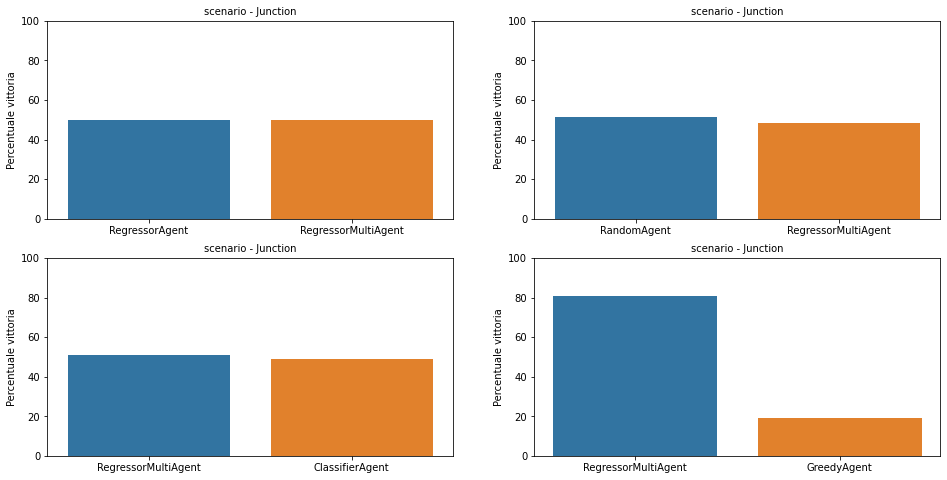

In [9]:
agentVs(dfAll,'RegressorMultiAgent')

AGENT VS AGENT
Percentage GreedyAgent on RegressorAgent: 0.73
Percentage GreedyAgent on RandomAgent: 0.745
Percentage GreedyAgent on ClassifierAgent: 0.825
Percentage GreedyAgent on RegressorMultiAgent: 0.81


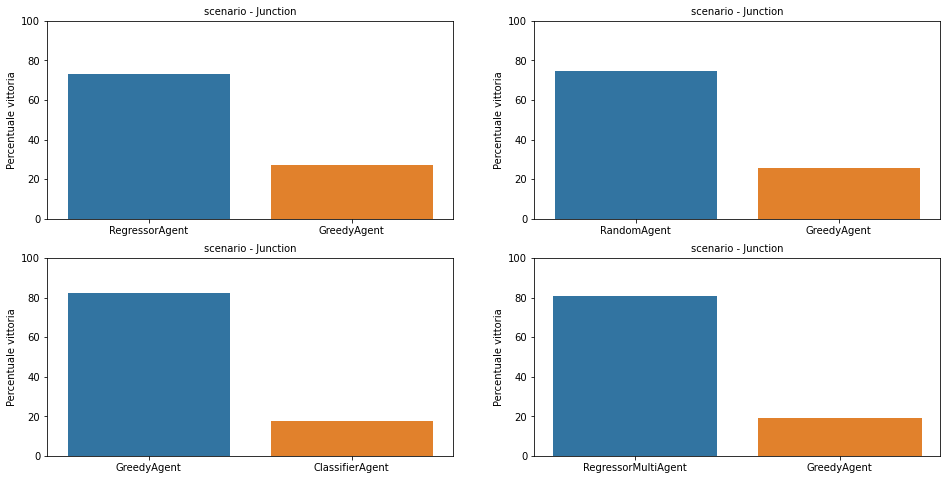

In [10]:
agentVs(dfAll,'GreedyAgent')

AGENT VS AGENT FOR COLOR
Percentage RegressorMultiAgent Red on RegressorAgent Blue: 0.04
Percentage RegressorMultiAgent Red on RandomAgent Blue: 0.06
Percentage RegressorMultiAgent Red on ClassifierAgent Blue: 0.03
Percentage RegressorMultiAgent Red on GreedyAgent Blue: 0.16
Percentage RegressorAgent Red on RegressorMultiAgent Blue: 0.96
Percentage RandomAgent Red on RegressorMultiAgent Blue: 0.97
Percentage ClassifierAgent Red on RegressorMultiAgent Blue: 0.99
Percentage GreedyAgent Red on RegressorMultiAgent Blue: 0.22


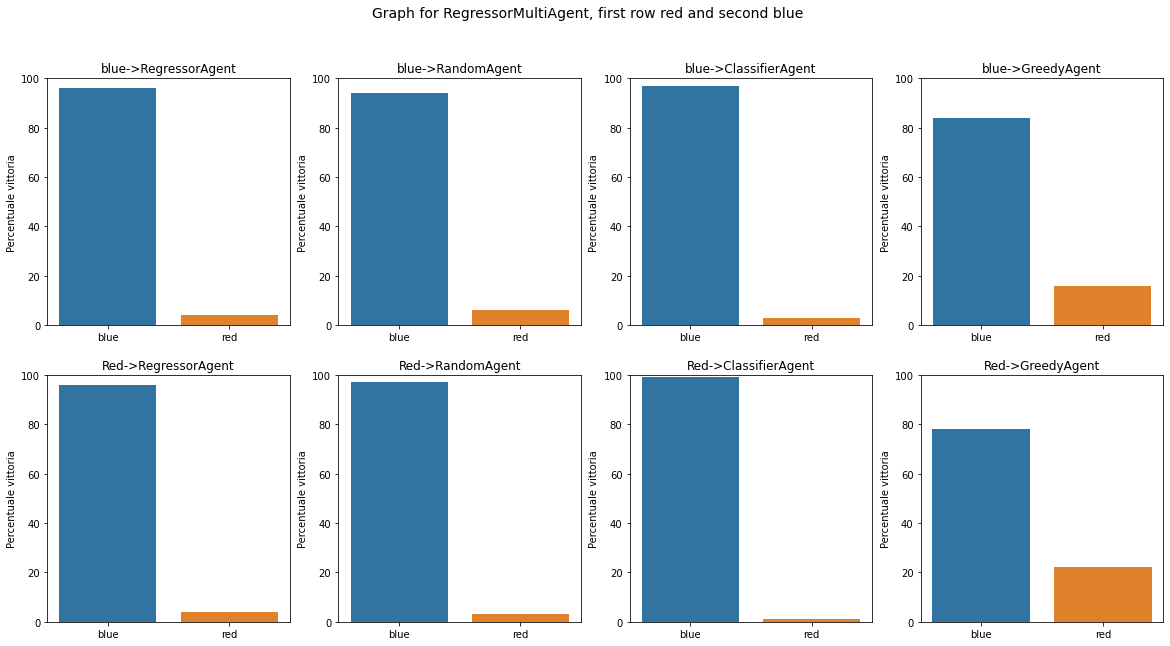

In [35]:
agentVsColor(dfAll,'RegressorMultiAgent')

AGENT VS AGENT FOR COLOR
Percentage RegressorAgent Red on RandomAgent Blue: 0.16
Percentage RegressorAgent Red on ClassifierAgent Blue: 0.07
Percentage RegressorAgent Red on GreedyAgent Blue: 0.27
Percentage RegressorAgent Red on RegressorMultiAgent Blue: 0.04
Percentage RandomAgent Red on RegressorAgent Blue: 0.95
Percentage ClassifierAgent Red on RegressorAgent Blue: 0.99
Percentage GreedyAgent Red on RegressorAgent Blue: 0.27
Percentage RegressorMultiAgent Red on RegressorAgent Blue: 0.96


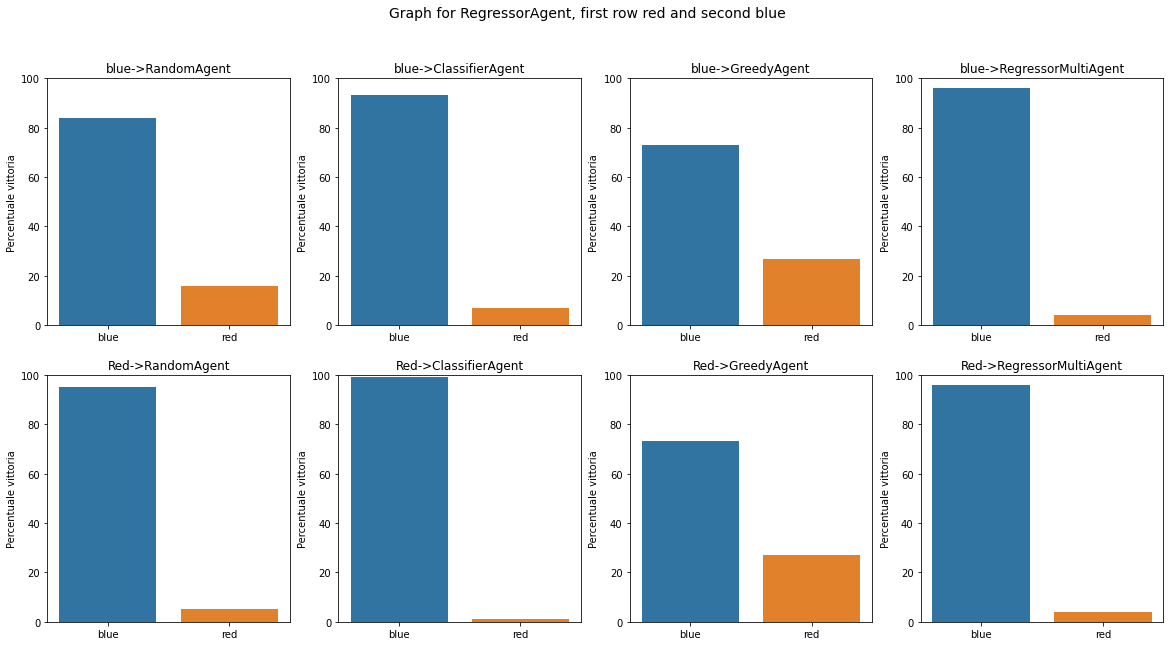

In [21]:
agentVsColor(dfAll,'RegressorAgent')

def agentVSagentColor(df,agent1,agent2,coloragent1):
    print("AGENTE VS AGENTE PER COLORE")
    if (coloragent1=="red"):
        mask=df.loc[((df.teamRed == agent1) & (df.teamBlue == agent2))]
        print(f'Percentage {agent1} Red on {agent2} Blue:',len(mask[mask['winner']==coloragent1])/len(mask))
        title=f'Percentage {agent1} Red on {agent2} Blue on scenario '
    else:
        mask=df.loc[((df.teamRed == agent2) & (df.teamBlue == agent1))]
        print(f'Percentage {agent1} Blue on {agent2} Red:',len(mask[mask['winner']==coloragent1])/len(mask))
        title=f'Percentage {agent1} Blue on {agent2} Red on scenario '

        
    departments=mask['scenario'].unique()

    fig, ax = plt.subplots(ncols=len(departments),nrows=1, figsize=(16,8))
    for i,name in enumerate(departments):
        dd=mask[(mask.scenario == name)]
        sns.barplot(y=((dd['winner'].value_counts())/len(dd))*100,x=dd['winner'].unique() ,ax=ax)
        ax.set_ylabel('Percentuale vittoria')
        ax.set(ylim=(0, 100))
        #print(title,name,len(dd[dd['winner']==coloragent1])/len(dd))
        title=f'Scenario->{name}. Agent red {agent1} and agent blue {agent2}'
        ax.set_title(title, fontsize=10)
        print(title,name,len(dd[dd['winner']==coloragent1])/len(dd))

    plt.plot() 
    #metti perncetuale per ogni scenario



def agentVSagentMoreScenario(df,agent1,agent2):
    print("AGENTE VS AGENTE")
    mask=df.loc[((df.teamRed == agent1) & (df.teamBlue == agent2))|((df.teamRed == agent2) & (df.teamBlue == agent1))]
    #mask['winnerAgent'].value_counts().plot.bar(title=f'Vincita {agent1} on {agent2}')
    print(f'Percentage {agent1} on {agent2}:',len(mask[mask['winnerAgent']==agent1])/len(mask))
    departments=mask['scenario'].unique()

    fig, ax = plt.subplots(ncols=len(departments),nrows=1, figsize=(16,8))
    for i,name in enumerate(departments):
        dd=mask[(mask.scenario == name)]
        #devi fare groupby su colonna winner, poi fai il count e dividi sul totale
        sns.barplot(y=((dd['winnerAgent'].value_counts())/len(dd))*100,x=dd['winnerAgent'].unique() ,ax=ax[i])
        ax[i].set_ylabel('Percentuale vittoria')
        ax[i].set(ylim=(0, 100))
        ax[i].set_title('scenario - {}'.format(name), fontsize=10)
        print(f'Percentage {agent1} on {agent2} on scenario {name}:',len(dd[dd['winnerAgent']==agent1])/len(dd))

    plt.plot() 
    #plotta percentuali-> fai solo scenario junction (nel caso junctionexo)


def agentVSagent(df,agent1,agent2):
    print("AGENT VS AGENT")
    mask=df.loc[((df.teamRed == agent1) & (df.teamBlue == agent2))|((df.teamRed == agent2) & (df.teamBlue == agent1))]
    #mask['winnerAgent'].value_counts().plot.bar(title=f'Vincita {agent1} on {agent2}')
    print(f'Percentage {agent1} on {agent2}:',len(mask[mask['winnerAgent']==agent1])/len(mask))
    departments=mask['scenario'].unique()

    fig, ax = plt.subplots(ncols=len(departments),nrows=1, figsize=(16,8))
    for i,name in enumerate(departments):
        dd=mask[(mask.scenario == name)]
        #devi fare groupby su colonna winner, poi fai il count e dividi sul totale
        sns.barplot(y=((dd['winnerAgent'].value_counts())/len(dd))*100,x=dd['winnerAgent'].unique() ,ax=ax)
        ax.set_ylabel('Percentuale vittoria')
        ax.set(ylim=(0, 100))
        ax.set_title('scenario - {}'.format(name), fontsize=10)
        #print(f'Percentage {agent1} on {agent2} on scenario {name}:',len(dd[dd['winnerAgent']==agent1])/len(dd))

    plt.plot() 
    #plotta percentuali-> fai solo scenario junction (nel caso junctionexo)


def agentVSagentColorMoreScenario(df,agent1,agent2,coloragent1):
    print("AGENTE VS AGENTE PER COLORE")
    if (coloragent1=="red"):
        mask=df.loc[((df.teamRed == agent1) & (df.teamBlue == agent2))]
        print(f'Percentage {agent1} Red on {agent2} Blue:',len(mask[mask['winner']==coloragent1])/len(mask))
        title=f'Percentage {agent1} Red on {agent2} Blue on scenario '
    else:
        mask=df.loc[((df.teamRed == agent2) & (df.teamBlue == agent1))]
        print(f'Percentage {agent1} Blue on {agent2} Red:',len(mask[mask['winner']==coloragent1])/len(mask))
        title=f'Percentage {agent1} Blue on {agent2} Red on scenario '

        
    departments=mask['scenario'].unique()

    fig, ax = plt.subplots(ncols=len(departments),nrows=1, figsize=(16,8))
    for i,name in enumerate(departments):
        dd=mask[(mask.scenario == name)]
        sns.barplot(y=((dd['winner'].value_counts())/len(dd))*100,x=dd['winner'].unique() ,ax=ax[i])
        ax[i].set_ylabel('Percentuale vittoria')
        ax[i].set(ylim=(0, 100))
        title=f'Scenario->{name}. Agent red {agent1} and agent blue {agent2}'
        ax[i].set_title(title, fontsize=10)
        print(title,name,len(dd[dd['winner']==coloragent1])/len(dd))

    plt.plot() 
    #metti perncetuale per ogni scenario

